In [24]:
import pandas as pd
import os
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#commande à n'exécuter qu'une fois
os.chdir('data/')

In [4]:
#on prend la liste des fichiers
files = [f for f in os.listdir('.') if os.path.isfile(f)]
data = pd.read_csv(files[0])
#la colonne +/- n'est pas prise en complte car on a pas sa moyenne pour les matchs de Wembenyama
data = data.loc[:, data.columns!='+/-']
#convertion des minutes par match en flottant
data.loc[:,'MP'] = [float(x.split(':')[0])+ 0.006*float(x.split(':')[1]) for x in data.loc[:,'MP']]
#concatenation de toutes les tables csv en un seul tableau
for file in files[1:]:
    match = pd.read_csv(file)
    match = match.loc[:,match.columns!='+/-']
    match.loc[:,'MP'] = [float(x.split(':')[0])+ 0.006*float(x.split(':')[1]) for x in match.loc[:,'MP']]
    data = pd.concat([data,match])
data.reset_index(drop=True, inplace=True)

print("nombre d'individus: ", len(data.index))

nombre d'individus:  223


In [16]:
#imputation des données manquantes
#remplace les données absentes par une données de la même colonne, avec la même valeur pour la variable Résultat
data_win = data[data['Résultat'] == 1]
data_lose = data[data['Résultat'] != 1]
for col in data_win.columns:
    for i,rows in data_win.iterrows():
        if pd.isna(data_win.loc[i,col]):
            data_win.loc[i,col] = np.random.choice(data_win[data_win[col].notna()].loc[:,col])
for col in data_lose.columns:
    for i,rows in data_lose.iterrows():
        if pd.isna(data_lose.loc[i,col]):
            data_lose.loc[i,col] = np.random.choice(data_lose[data_lose[col].notna()].loc[:,col])
data = pd.concat([data_win,data_lose])

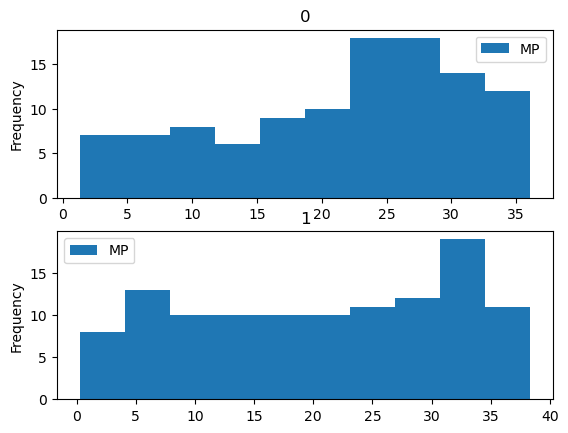

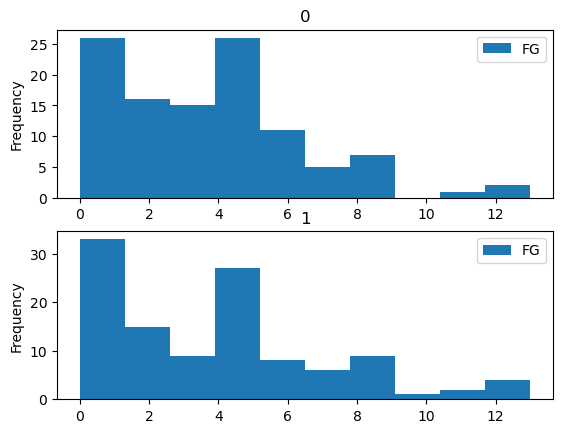

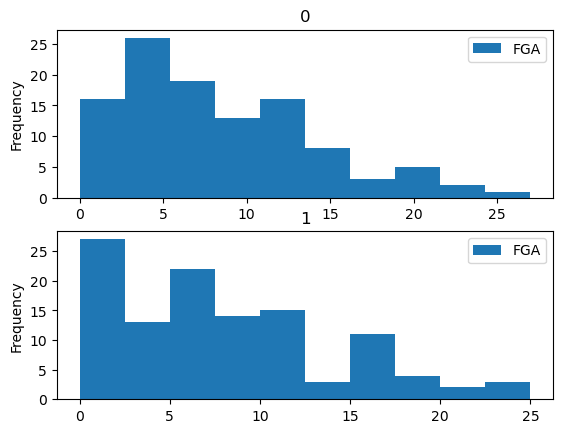

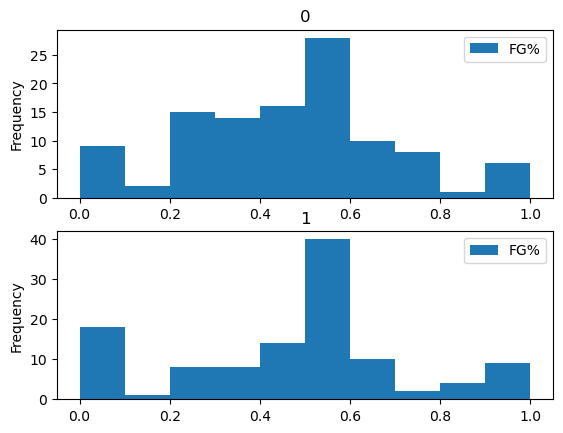

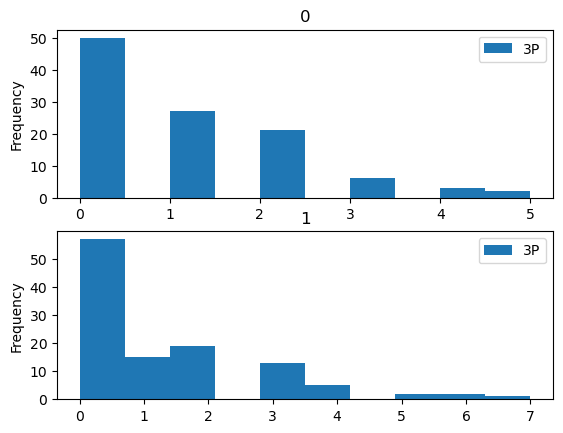

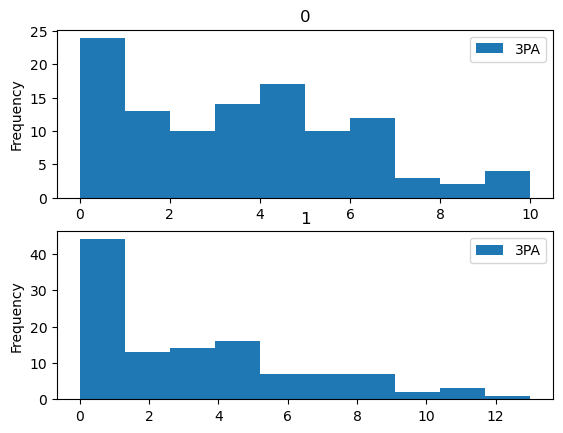

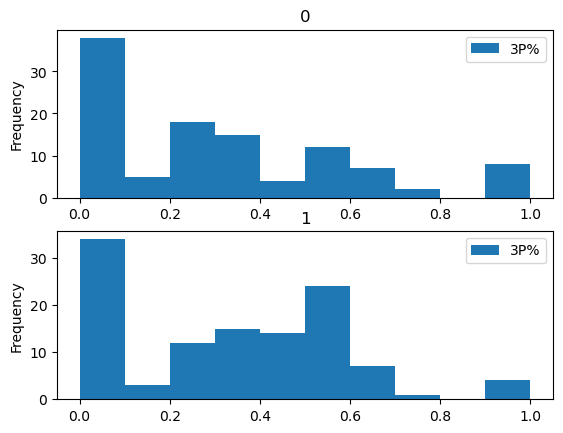

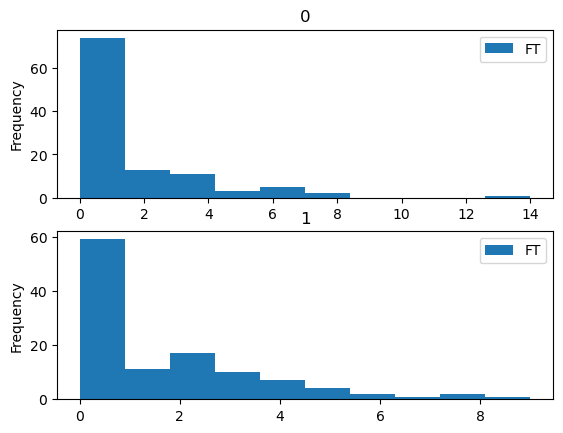

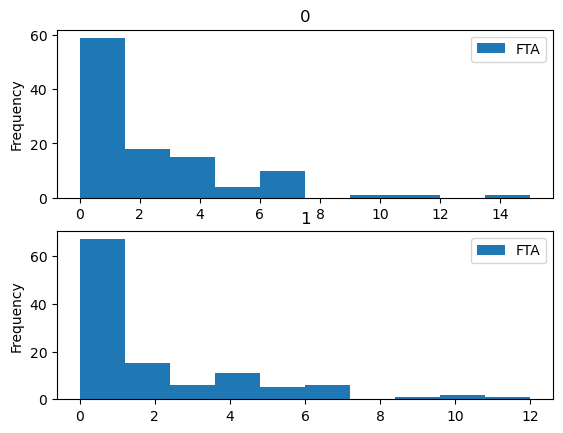

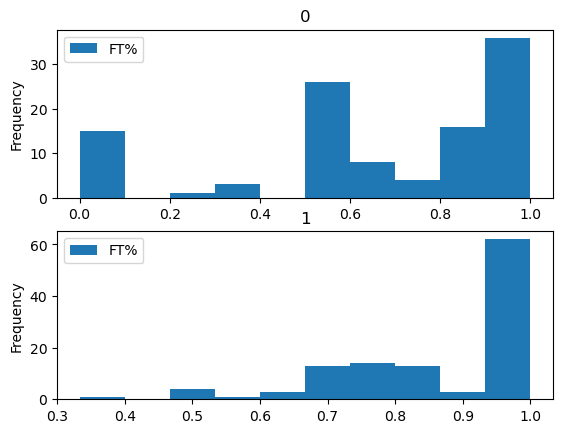

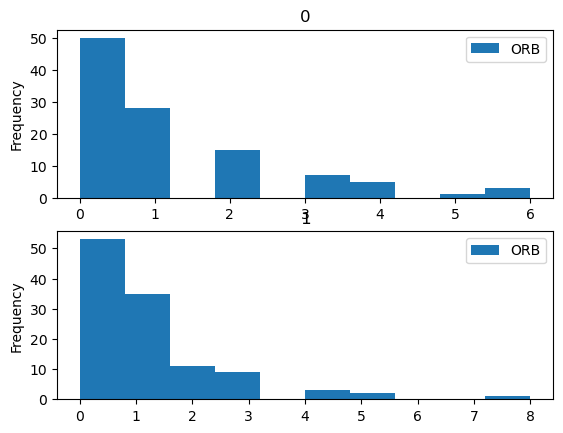

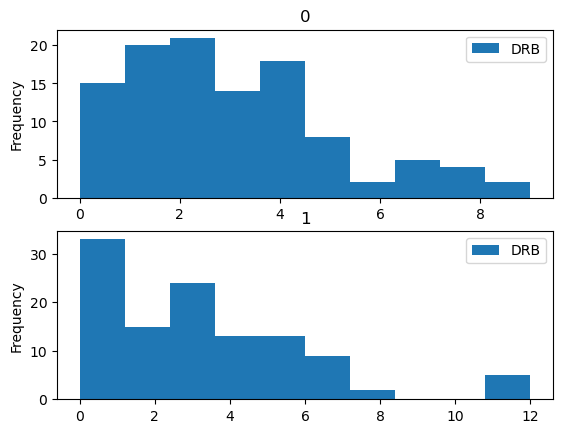

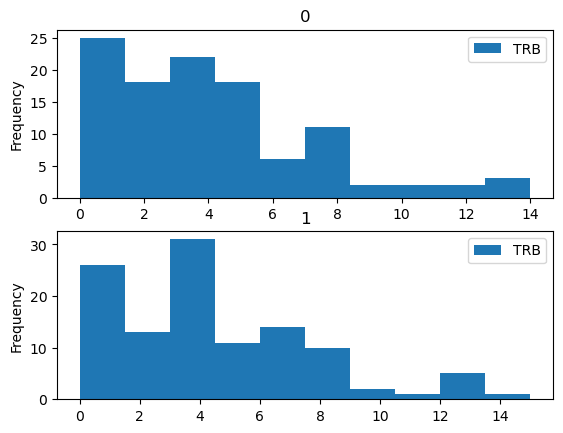

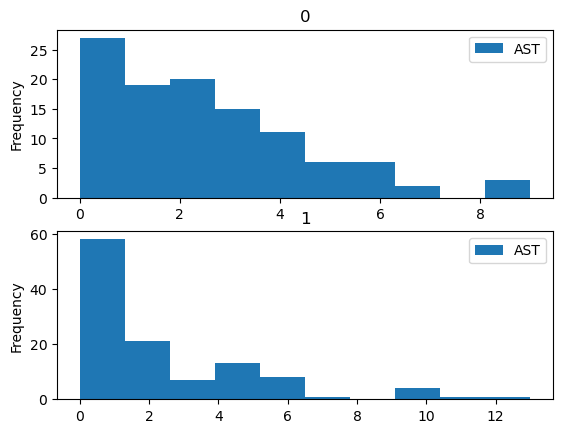

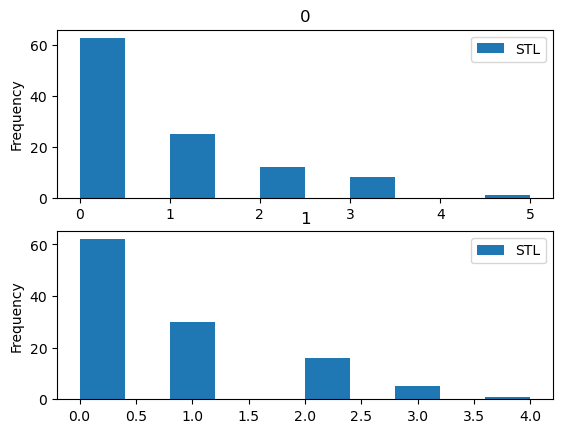

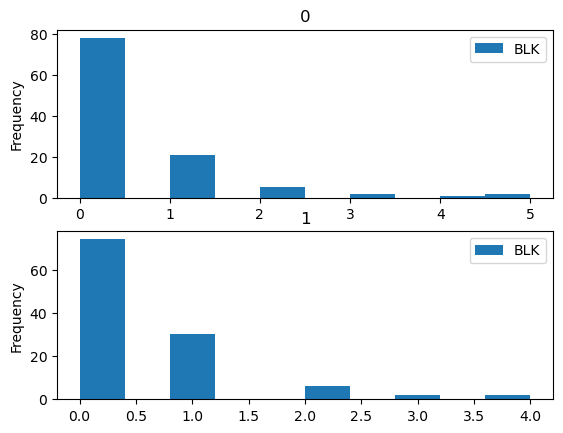

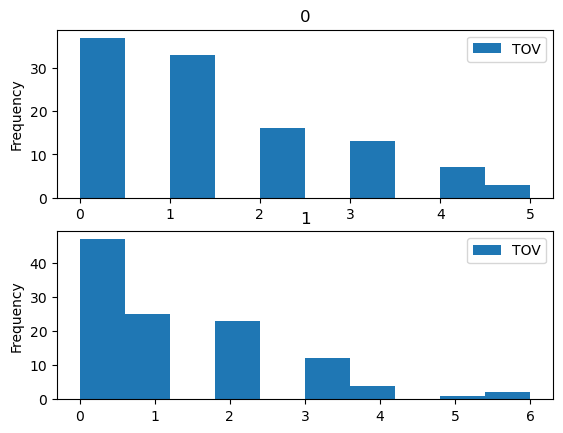

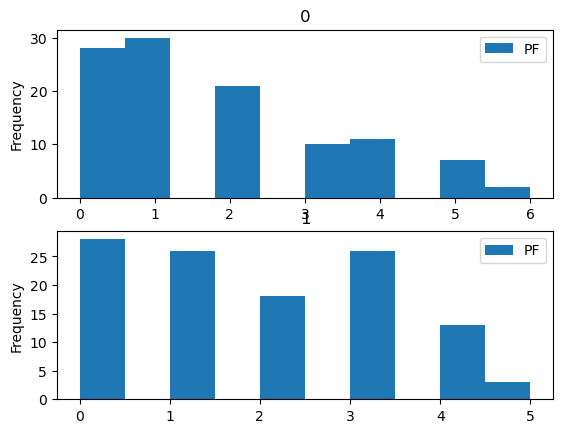

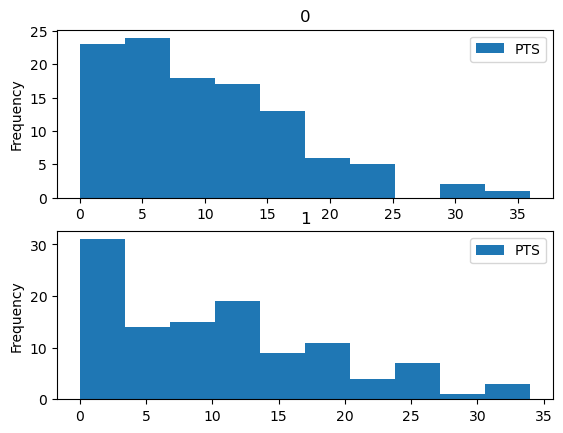

In [23]:
for col in data.iloc[:,1:-1].columns:
    ax = data.plot.hist(column = col, by = 'Résultat')

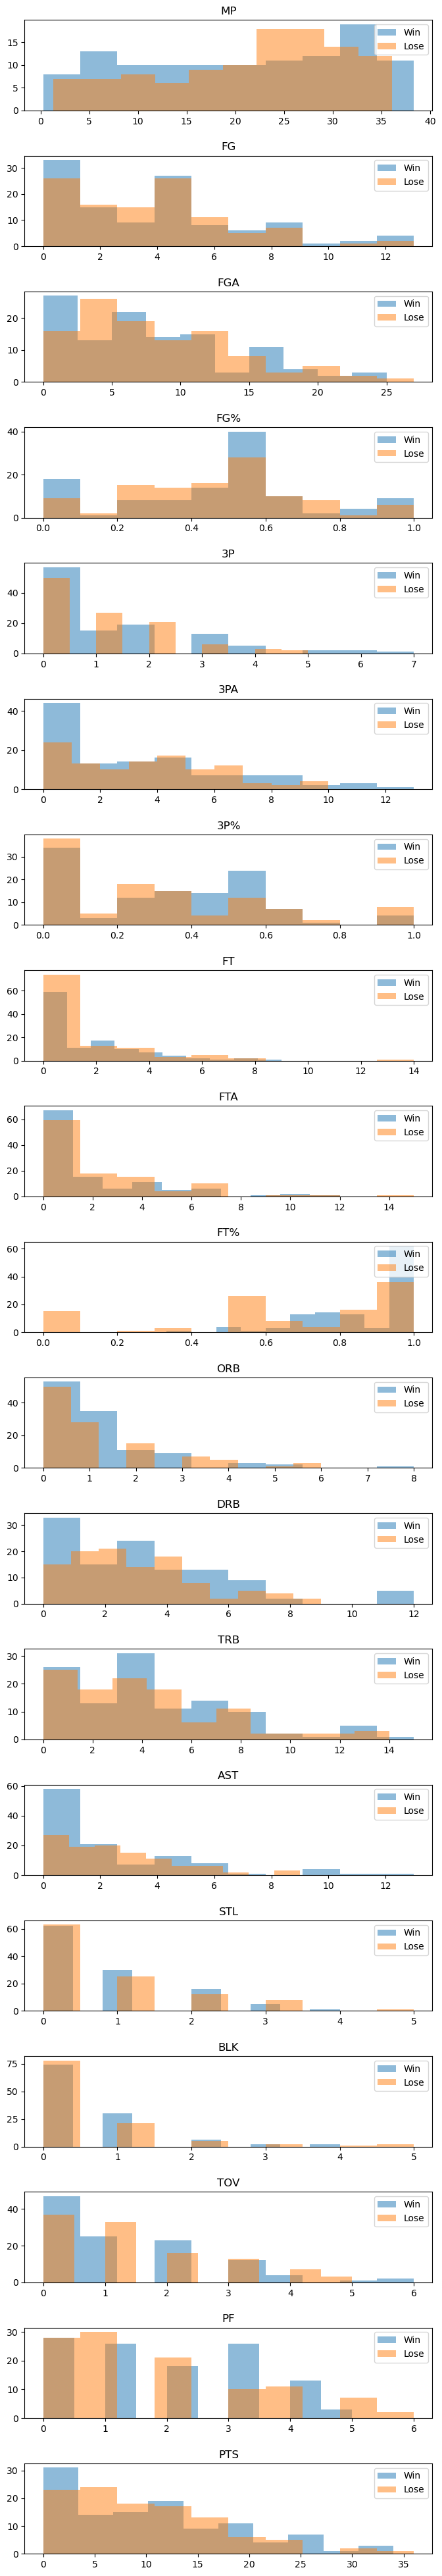

In [36]:
plt.figure(figsize=(8, 50))
lignes = len(data.iloc[:,1:-1].columns)
plt.subplots_adjust(hspace=0.5)

for n,col in enumerate(data.iloc[:,1:-1].columns):
    ax = plt.subplot(lignes, 1, n+1)
    Win = data.loc[data['Résultat'] == 1, col]
    Lose = data.loc[data['Résultat'] == 0, col]
    ax.hist(Win, alpha = 0.5, label  = 'Win')
    ax.hist(Lose, alpha = 0.5, label = 'Lose')
    ax.legend(loc='upper right')
    ax.set_title(col)
plt.show()